<a href="https://colab.research.google.com/github/jayanezj/IABD-PIA/blob/main/unidad-1/100_entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entregable Pandas

## Importación de Pandas

Nuestro primer paso en este cuadernillo será importar ```pandas```, que suele importarse como ```pd```.

In [1]:
import pandas as pd

# Cargar un gran ```dataframe```

Ahora, vamos a cargar un nuevo conjunto de datos a partir de una URL remota que nos descargará un ```csv```. Para ello, utilizaremos el comando de linux ```wget```.

In [2]:
!wget https://datosabiertos.jcyl.es/web/jcyl/risp/es/salud/donaciones-sangre/1284925341181.csv

--2023-11-12 18:51:27--  https://datosabiertos.jcyl.es/web/jcyl/risp/es/salud/donaciones-sangre/1284925341181.csv
Resolving datosabiertos.jcyl.es (datosabiertos.jcyl.es)... 217.71.16.29
Connecting to datosabiertos.jcyl.es (datosabiertos.jcyl.es)|217.71.16.29|:443... connected.
HTTP request sent, awaiting response... 302 Movido temporalmente
Location: https://analisis.datosabiertos.jcyl.es/api/explore/v2.1/catalog/datasets/donaciones-de-sangre-y-aferesis/exports/csv?lang=es&timezone=Europe%2FMadrid&use_labels=true&delimiter=%3B [following]
--2023-11-12 18:51:35--  https://analisis.datosabiertos.jcyl.es/api/explore/v2.1/catalog/datasets/donaciones-de-sangre-y-aferesis/exports/csv?lang=es&timezone=Europe%2FMadrid&use_labels=true&delimiter=%3B
Resolving analisis.datosabiertos.jcyl.es (analisis.datosabiertos.jcyl.es)... 52.29.97.146, 35.158.56.174
Connecting to analisis.datosabiertos.jcyl.es (analisis.datosabiertos.jcyl.es)|52.29.97.146|:443... connected.
HTTP request sent, awaiting respons

 Ahora que ya hemos descargado el conjunto de datos después leeremos el fichero en  ```python```. Cabe destacar que en este caso el delimitador del CSV no es ```,``` si no que es ```;```, por lo que debemos añadir el separador específico.

In [3]:
df = pd.read_csv("1284925341181.csv", sep=";") # leemos el csv
df

,Num_reg,Fecha_donacion,Grupo,Rh,Edad,Provincia,Genero,Tipo_donacion
0,506002,2022-10-06,A,-,62,Salamanca,M,SANGRE T. ALOGENICA
1,506004,2022-10-06,O,+,62,Salamanca,F,SANGRE T. ALOGENICA
2,506005,2022-10-06,A,+,62,Salamanca,M,SANGRE T. ALOGENICA
3,506010,2022-10-06,O,+,64,Segovia,M,SANGRE T. ALOGENICA
4,506011,2022-10-06,O,+,64,Ávila,M,SANGRE T. ALOGENICA
...,...,...,...,...,...,...,...,...
612862,499990,2022-09-19,A,+,49,León,F,SANGRE T. ALOGENICA
612863,499993,2022-09-19,A,+,44,Valladolid,F,SANGRE T. ALOGENICA
612864,499994,2022-09-19,O,+,55,Valladolid,M,SANGRE T. ALOGENICA
612865,499995,2022-09-19,B,+,43,Valladolid,M,SANGRE T. ALOGENICA


Como puedes ver abajo a la izquierda, este conjunto de datos tiene 612867 filas (a menos que lo hayan actualualizado desde la última vez!) y 8 columnas (lo que viene siendo un conjunto de datos del mundo real).

Lo bueno de que sea un conjunto tan grande de datos es que nos va a permitir hacer un **Análisis Exploratorio de Datos**, que es el objetivo de este entregable.

# Análisis Exploratorio de Datos (AED)

## Contextualizando los datos

Este ```dataset``` contiene información sobre las donaciones de sangre y aféresis en la comunidad de Castilla y León. Podemos encontrar fechas de donación, grupos sanguíneos, edad y género de los donantes, su provincia de origen y por supuesto el tipo de donación que han realizado.

## Eliminación de columnas inútiles

En un AED, buscaremos explicar de forma resumida la información más relevante a simple vista de nuestro conjunto de datos. Por ejemplo, podemos comenzar explicando cada una de las columnas.

In [4]:
df.columns

Index(['Num_reg', 'Fecha_donacion', 'Grupo', 'Rh', 'Edad', 'Provincia',
       'Genero', 'Tipo_donacion'],
      dtype='object')

Entre las columnas que podemos descartar nos encontramos con ```num_reg```, el índice de donación que el sistema lleva de forma interna, algo que no nos interesa para el tratamiento de datos con IA.

Por otra parte, este conjunto de datos ofrece varios puntos sobre los que podríamos enfocarnos, y en esta ocasión nos vamos a centrar más en las estadísticas en torno a los donantes y menos en el tipo sanguíneo, por lo que podríamos descartar sin problemas las columnas ```Grupo``` y ```Rh```.

Para eliminar estas columnas, podemos simplemente crear un ```subdataframe``` con todas las columnas menos las que no nos interesan.

Siguiendo lo visto en el cuadernillo de ```Pandas``` vamos a proceder a eliminar la primera columna cogiendo el subconjunto de columnas que van a partir de ésta.

Para eliminar las columnas centrales que no nos interesan también podemos ayudarnos de la función ```pop```, o simplemente podemos filtrar las columnas que nos interesan.

In [5]:
# Método 1:
sub_columns = df.columns[1:] # quito la primera columna
df = df[sub_columns]# genero un subconjunto sin la primera columna

# Método 2:
df.pop('Grupo') # Elimino la columna de grupo sanguíneo

# Método 3:
df = df[["Fecha_donacion", "Edad", "Provincia", "Genero", "Tipo_donacion"]] # Me quedo con las columnas que me intesan
df

,Fecha_donacion,Edad,Provincia,Genero,Tipo_donacion
0,2022-10-06,62,Salamanca,M,SANGRE T. ALOGENICA
1,2022-10-06,62,Salamanca,F,SANGRE T. ALOGENICA
2,2022-10-06,62,Salamanca,M,SANGRE T. ALOGENICA
3,2022-10-06,64,Segovia,M,SANGRE T. ALOGENICA
4,2022-10-06,64,Ávila,M,SANGRE T. ALOGENICA
...,...,...,...,...,...
612862,2022-09-19,49,León,F,SANGRE T. ALOGENICA
612863,2022-09-19,44,Valladolid,F,SANGRE T. ALOGENICA
612864,2022-09-19,55,Valladolid,M,SANGRE T. ALOGENICA
612865,2022-09-19,43,Valladolid,M,SANGRE T. ALOGENICA


## Creación de nuevas **features**

Observando los datos sabemos la edad del donante en la fecha que realizó la donación, información suficiente para poder fijar el año de nacimiento de los donantes.

In [6]:
df['Fecha_donacion'] = pd.to_datetime(df['Fecha_donacion'], format='%Y-%m-%d')
df['Year'] = df['Fecha_donacion'].dt.year
df['Born'] = df.Year - df.Edad
df

,Fecha_donacion,Edad,Provincia,Genero,Tipo_donacion,Year,Born
0,2022-10-06,62,Salamanca,M,SANGRE T. ALOGENICA,2022,1960
1,2022-10-06,62,Salamanca,F,SANGRE T. ALOGENICA,2022,1960
2,2022-10-06,62,Salamanca,M,SANGRE T. ALOGENICA,2022,1960
3,2022-10-06,64,Segovia,M,SANGRE T. ALOGENICA,2022,1958
4,2022-10-06,64,Ávila,M,SANGRE T. ALOGENICA,2022,1958
...,...,...,...,...,...,...,...
612862,2022-09-19,49,León,F,SANGRE T. ALOGENICA,2022,1973
612863,2022-09-19,44,Valladolid,F,SANGRE T. ALOGENICA,2022,1978
612864,2022-09-19,55,Valladolid,M,SANGRE T. ALOGENICA,2022,1967
612865,2022-09-19,43,Valladolid,M,SANGRE T. ALOGENICA,2022,1979


## Análisis estadístico inicial

Ahora, nos interesa saber de qué tipos son los datos a los que nos vamos a enfrentar.

Para ver un análisis general del dataset, podemos usar las funciones ```info``` y ```describe```.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612867 entries, 0 to 612866
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Fecha_donacion  612867 non-null  datetime64[ns]
 1   Edad            612867 non-null  int64         
 2   Provincia       612867 non-null  object        
 3   Genero          612867 non-null  object        
 4   Tipo_donacion   612867 non-null  object        
 5   Year            612867 non-null  int64         
 6   Born            612867 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 32.7+ MB


In [8]:
df.describe()

,Edad,Year,Born
count,612867.000000,612867.000000,612867.000000
mean,44.010588,2020.419407,1976.408820
std,12.872742,1.662589,12.843183
min,18.000000,2018.000000,1941.000000
25%,35.000000,2019.000000,1966.000000
50%,46.000000,2020.000000,1975.000000
75%,54.000000,2022.000000,1986.000000
max,79.000000,2023.000000,2005.000000


La primera función nos indica el tipo de datos y la cantidad de entradas. Vemos, por ejemplo, que todas las **features** tienen valor para todas las filas, es decir, **NO** existen datos nulos en este conjunto de datos.

El segundo método nos devuelve un análisis estadístico para todas las columnas (**features**) numéricas. En este caso, nos devuelve la cantidad de filas, la media de éstas, la desviación típica, el valor mínimo, los cuartiles y el valor máximo.

Otro paso interesante sería estudiar las diferentes provincias de este conjunto de datos, es decir, la unicidad de la columna **Provincia**.

In [10]:
df.Provincia.unique()

array(['Salamanca', 'Segovia', 'Ávila', 'León', 'Valladolid', 'Burgos',
       'Zamora', 'Soria', 'Palencia'], dtype=object)

Con la función ```unique```, que devuelve los valores sin repetición de una ```Serie```, podemos observar las nueve provincias de la comunidad de Castilla y León, lo que afortunadamente significa que en todas las provicias hay donantes.

## Observación sobre datos atípicos (```outliers```)

Observando los datos podemos ver que el rango de edades de los donantes está bastante bien repartido en el espectro, y que la media (44 años) está bastante cercana a la mediana (46 años), por lo que no detectamos ninguna desviación.

Si nos fijamos en la columna de años podemos observar que los registros empiezan en 2018 llegan hasta la actualidad, pero hay que tener en cuenta que el año 2023 no ha terminado y la media de 2020.4 se sitúa por encima de la mediana 2020, lo que significa que el número de donaciones está aumentando año a año.

## Análisis estadístico avanzado

Observando la columna ```Tipo_donacion``` Podemos ver que hay varios tipos de donación aplicables: **SANGRE T. ALOGENICA**, **AFERESIS DE PLAQUETAS**, **AFERESIS DE PLASMA** y **AFERESIS PLASMA CONVALECIENTE COVID-19**.

Podemos realizar un análisis estadístico sobre las filas calculando porcentajes en función del tipo de donación aplicable.

In [11]:
total = len(df)
total_alogenic = len(df[df["Tipo_donacion"] == "SANGRE T. ALOGENICA"])
platelet_aphoresis = len(df[df["Tipo_donacion"] == "AFERESIS DE PLAQUETAS"])
apheresis_plasma = len(df[df["Tipo_donacion"] == "AFERESIS DE PLASMA"])
apheresis_plasma_covid = len(df[df["Tipo_donacion"] == "AFERESIS PLASMA CONVALECIENTE COVID-19"])
percentage_alogenic=round(total_alogenic * 100 / total, 2)
percentage_platelets=round(platelet_aphoresis * 100 / total, 2)
percentage_plasma=round(apheresis_plasma * 100 / total, 2)
percentage_covid=round(apheresis_plasma_covid * 100 / total, 2)
print(f'- Sangre Total Alogénica: {total_alogenic}, porcentaje sobre el total: {percentage_alogenic}%')
print(f'- Aféresis de Plaquetas: {platelet_aphoresis}, porcentaje sobre el total: {percentage_platelets}%')
print(f'- Aféresis de Plasma: {apheresis_plasma}, porcentaje sobre el total: {percentage_plasma}%')
print(f'- Aféresis de Plasma COVID 19: {apheresis_plasma_covid}, porcentaje sobre el total: {percentage_covid}%')
print(f'- Total: {total}, Suma de porcentajes: {percentage_alogenic + percentage_platelets + percentage_plasma + percentage_covid}%')

- Sangre Total Alogénica: 570731, porcentaje sobre el total: 93.12%
- Aféresis de Plaquetas: 12442, porcentaje sobre el total: 2.03%
- Aféresis de Plasma: 28006, porcentaje sobre el total: 4.57%
- Aféresis de Plasma COVID 19: 1688, porcentaje sobre el total: 0.28%
- Total: 612867, Suma de porcentajes: 100.0%


## Representación gráfica

Vamos a proceder a realizar una representación gráfica del conjunto de datos, para lo que primero creamos un ```subconjunto```de datos reduciendo las dimensiones. Supongamos que por ejemplo estamos interesados en obtener información sobre las edades de los donantes y sus provincias de origen.

Debido al gran volumen de datos disponible nos centraremos en las donaciones de sangre realizadas el día 1 de febrero de 2023.

In [12]:
_df = df[["Genero", "Provincia", "Edad"]] # Me quedo con las columnas que me intesan
_df = _df[(df['Fecha_donacion'] == '2023-02-01')] # Filtro por un rango de fecha específico

_df

,Genero,Provincia,Edad
68275,M,Burgos,67
68276,F,Palencia,25
68277,M,Ávila,26
68278,M,Burgos,50
68279,M,Valladolid,48
...,...,...,...
575998,M,Segovia,56
575999,F,Palencia,19
576000,F,Palencia,18
576001,F,Palencia,18


Finalmente, con la **dimensionalidad reducida**, puedo representar esta información. Como tengo tres columnas, necesitaré tres dimensiones. Comenzaremos por mostrar la información de edad y provincia en 2D:

In [13]:
import matplotlib.pyplot as plt

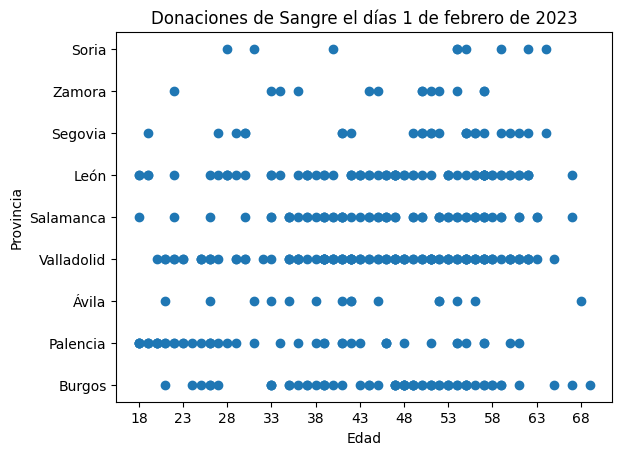

In [14]:
fig, ax = plt.subplots()
plt.title('Donaciones de Sangre el días 1 de febrero de 2023')
ax.set_xlabel('Edad')
ax.set_ylabel('Provincia')
ax.set_xticks(range(18,75, 5))
plt.scatter(_df.Edad, _df.Provincia)


En el gráfico anterior, tenemos la edad de los donantes X y la provincia en las Y. Se pueden diferenciar con facilidad las provincias con un mayor ratio de donantes.

¿Y cómo añadimos la tercera dimensión? No es necesario que añadamos dimensiones al gráfico, simplemente podemos especificar un color para cada marcador en función de si el donante es hombre o mujer.


In [15]:
_df["GenreColor"] = _df["Genero"].apply(lambda s: "blue" if s == "M" else "green" if s == "F" else "red")
_df

,Genero,Provincia,Edad,GenreColor
68275,M,Burgos,67,blue
68276,F,Palencia,25,green
68277,M,Ávila,26,blue
68278,M,Burgos,50,blue
68279,M,Valladolid,48,blue
...,...,...,...,...
575998,M,Segovia,56,blue
575999,F,Palencia,19,green
576000,F,Palencia,18,green
576001,F,Palencia,18,green


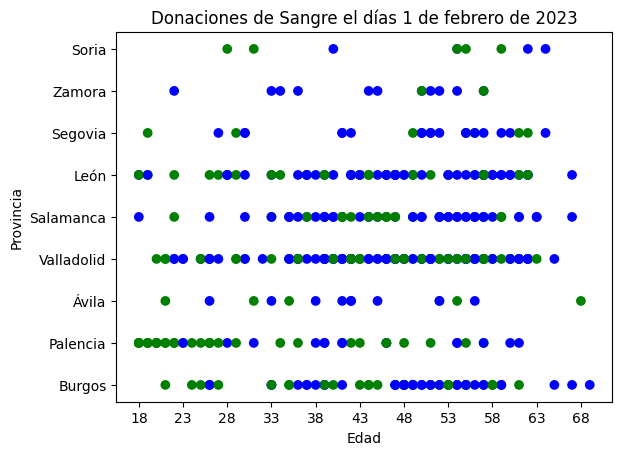

In [16]:
fig, ax = plt.subplots()
plt.title('Donaciones de Sangre el días 1 de febrero de 2023')
ax.set_xlabel('Edad')
ax.set_ylabel('Provincia')
ax.set_xticks(range(18,75, 5))
plt.scatter(_df.Edad, _df.Provincia, c=_df.GenreColor)


Ahora que hemos diferenciado hombres (azul) de mujeres (verde) podemos ver que por ejemplo en Palencia predominaron las donaciones por parte de mujeres jóvenes, mientras que en Zamora casi todas las donaciones se produjeron por parte de hombres.

## Agrupación por clases

Aprovechando que tenemos un ```dataframe``` con **labels**, podemos agrupar la información de dicho ```dataframe``` por esas **labels**, como si fuese una operación de ```group by``` en una base de datos (de hecho, el nombre de la función es justamente ese).

In [17]:
df.groupby("Provincia")

Este objeto tan raro contiene información estadística de nuestra agrupación. Por ejemplo, podemos ver los estadísticos para cada clase:

In [19]:
df.groupby("Provincia").describe().transpose()

Provincia          Burgos          León      Palencia     Salamanca  \
Edad count  116374.000000  95462.000000  36817.000000  77406.000000   
     mean       45.174876     44.306656     44.543635     42.038421   
     std        12.318159     12.804033     12.734291     13.636559   
     min        18.000000     18.000000     18.000000     18.000000   
     25%        37.000000     35.000000     35.000000     30.000000   
     50%        47.000000     46.000000     47.000000     44.000000   
     75%        55.000000     55.000000     55.000000     53.000000   
     max        76.000000     74.000000     73.000000     72.000000   
Year count  116374.000000  95462.000000  36817.000000  77406.000000   
     mean     2020.420163   2020.454453   2020.419534   2020.359107   
     std         1.676058      1.663194      1.667915      1.659625   
     min      2018.000000   2018.000000   2018.000000   2018.000000   
     25%      2019.000000   2019.000000   2019.000000   2019.000000   
     50%      2020.000000   2020.000000   2020.000000   2020.000000   
     75%      2022.000000   2022.000000   2022.000000   2022.000000   
     max      2023.000000   2023.000000   2023.000000   2023.000000   
Born count  116374.000000  95462.000000  36817.000000  77406.000000   
     mean     1975.245287   1976.147797   1975.875900   1978.320686   
     std        12.318461     12.792215     12.743679     13.584316   
     min      1945.000000   1947.000000   1949.000000   1947.000000   
     25%      1966.000000   1966.000000   1965.000000   1967.000000   
     50%      1974.000000   1974.000000   1974.000000   1976.000000   
     75%      1983.000000   1986.000000   1985.000000   1990.000000   
     max      2005.000000   2005.000000   2005.000000   2005.000000   

Provincia        Segovia         Soria     Valladolid        Zamora  \
Edad count  36469.000000  28096.000000  160651.000000  29894.000000   
     mean      44.385999     44.596775      43.555944     45.086506   
     std       12.630605     12.878386      13.008708     12.427596   
     min       18.000000     18.000000      18.000000     18.000000   
     25%       35.000000     35.000000      34.000000     36.000000   
     50%       47.000000     46.000000      46.000000     47.000000   
     75%       54.000000     55.000000      54.000000     55.000000   
     max       72.000000     75.000000      77.000000     72.000000   
Year count  36469.000000  28096.000000  160651.000000  29894.000000   
     mean    2020.375141   2020.427249    2020.434650   2020.439419   
     std        1.673978      1.631568       1.659857      1.645230   
     min     2018.000000   2018.000000    2018.000000   2018.000000   
     25%     2019.000000   2019.000000    2019.000000   2019.000000   
     50%     2020.000000   2020.000000    2020.000000   2020.000000   
     75%     2022.000000   2022.000000    2022.000000   2022.000000   
     max     2023.000000   2023.000000    2023.000000   2023.000000   
Born count  36469.000000  28096.000000  160651.000000  29894.000000   
     mean    1975.989141   1975.830474    1976.878706   1975.352914   
     std       12.553568     12.843787      12.973594     12.403220   
     min     1948.000000   1946.000000    1942.000000   1950.000000   
     25%     1966.000000   1966.000000    1967.000000   1965.000000   
     50%     1974.000000   1974.000000    1975.000000   1974.000000   
     75%     1985.000000   1985.000000    1987.000000   1984.000000   
     max     2005.000000   2005.000000    2005.000000   2005.000000   

Provincia          Ávila  
Edad count  31698.000000  
     mean      43.379361  
     std       12.598136  
     min       18.000000  
     25%       34.000000  
     50%       45.000000  
     75%       54.000000  
     max       79.000000  
Year count  31698.000000  
     mean    2020.406051  
     std        1.651545  
     min     2018.000000  
     25%     2019.000000  
     50%     2020.000000  
     75%     2022.000000  
     max     202

Por ejemplo, si realizamos la agrupación por provincias y géneros, podríamos ver los detalles que hemos visto antes gráficamente.

In [20]:
_df.groupby(["Provincia", "Genero"])[["Edad"]].describe()

Edad                                                      
                  count       mean        std   min    25%   50%    75%   max
Provincia  Genero                                                            
Burgos     F       30.0  45.200000  11.009087  21.0  39.25  47.5  53.00  61.0
           M       34.0  47.588235  10.666054  26.0  39.00  48.5  54.00  69.0
León       F       27.0  41.851852  13.155004  18.0  31.00  44.0  52.00  62.0
           M       45.0  47.311111  11.710179  18.0  40.00  47.0  57.00  67.0
Palencia   F       33.0  29.060606  12.201279  18.0  20.00  24.0  36.00  57.0
           M       14.0  43.714286  12.047525  23.0  38.25  41.0  54.00  61.0
Salamanca  F       21.0  43.904762   8.745883  22.0  41.00  44.0  47.00  59.0
           M       39.0  47.615385  11.280200  18.0  39.00  50.0  56.00  67.0
Segovia    F        8.0  48.250000  15.718506  19.0  44.00  55.0  57.25  62.0
           M       17.0  48.000000  11.124298  27.0  41.00  51.0  56.00  64.0
Soria      F        5.0  45.400000  14.673105  28.0  31.00  54.0  55.00  59.0
           M        4.0  55.000000  10.893423  40.0  50.50  58.0  62.50  64.0
Valladolid F       47.0  44.638298  12.241102  20.0  36.00  47.0  54.50  63.0
           M       73.0  45.342466  11.138296  22.0  39.00  46.0  55.00  65.0
Zamora     F        2.0  53.500000   4.949747  50.0  51.75  53.5  55.25  57.0
           M       11.0  43.454545  10.884518  22.0  35.00  45.0  51.50  57.0
Ávila      F        6.0  43.500000  17.421251  21.0  32.00  43.5  53.50  68.0
           M        9.0  41.666667   9.069179  26.0  38.00  42.0  45.00  56.0

Fíjate en que la media de donantes mujeres en Palencia es de 24 años y que en Zamora solo hubo dos mujeres donantes por los once hombres.

## Análisis de correlación

Para terminar el AED, vamos a hablar sobre las variables correladas.

Este tipo de variable son un gran problema para los modelos de IA, y es que explican información que ya está siendo explicada por otras **features** del mismo _dataset_. En nuestro ```dataframe```, dos **features** correladas serían las edades y los años de nacimiento dado que una se obtiene directamente con la otra.

En general, estos valores deben estudiarse y eliminarse del conjunto de datos (da igual cuál de las dos se borre), dado que puede afectar a la eficiencia de los modelos de IA.

In [21]:
df.corr(numeric_only=True)

,Edad,Year,Born
Edad,1.000000,0.082336,-0.991643
Year,0.082336,1.000000,0.046927
Born,-0.991643,0.046927,1.000000


Como puedes observar, cada **feature** se correlaciona consigo misma en un nivel de 1 (nivel máximo de correlación). El año en el que se produce la donación no tiene apenas correlación con el resto de valores, pero como vemos, la edad del donante y su año de nacimiento estánestán altamente correlados.

Una correlación entre dos variables indica que esas dos variables explican la misma **feature**. En palabras más sencillas, indican que esas dos **features** se comportan de la misma forma: cuando una sube su valor, la otra también lo hace; y _viceversa_.

Por otra parte, dos **features inversamente correladas** se comportan de forma completamente contraria: cuando una sube, la otra baja. Ambas correlaciones deben ser eliminadas.

Finalmente, huelga decir que podemos tener una representación gráfica de esta matriz para ver mejor las correlaciones:

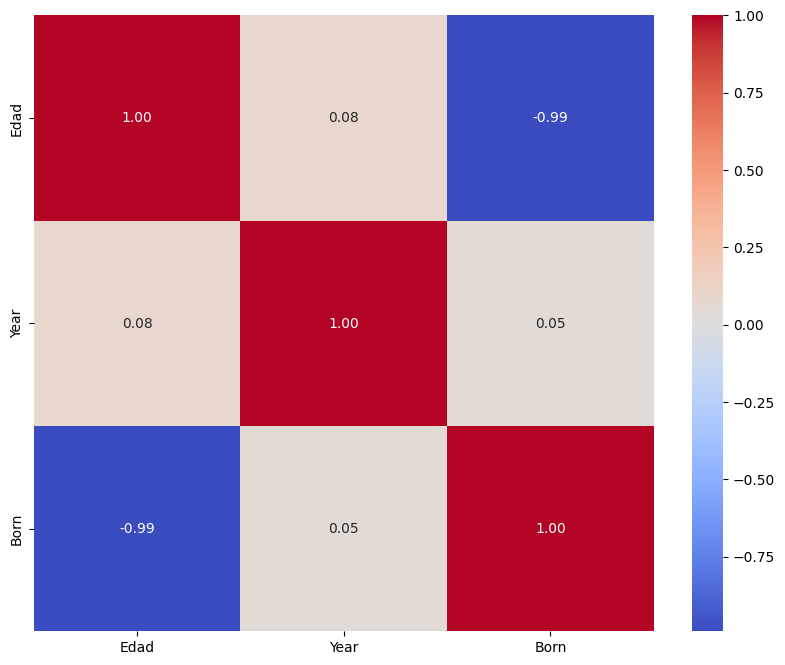

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.show()